# 1-lr-线性回归

   1> w0=1.000000, w1=1.000000, loss=44.175000
   2> w0=1.209000, w1=1.190600, loss=36.538828
   3> w0=1.399164, w1=1.363579, loss=30.231687
   4> w0=1.572208, w1=1.520546, loss=25.022227
   5> w0=1.729693, w1=1.662961, loss=20.719373
   6> w0=1.873039, w1=1.792151, loss=17.165309
   7> w0=2.003532, w1=1.909325, loss=14.229691
   8> w0=2.122345, w1=2.015577, loss=11.804865
   9> w0=2.230542, w1=2.111905, loss=9.801916
  10> w0=2.329091, w1=2.199215, loss=8.147408
  11> w0=2.418871, w1=2.278330, loss=6.780688
  12> w0=2.500681, w1=2.349997, loss=5.651660
  13> w0=2.575247, w1=2.414898, loss=4.718950
  14> w0=2.643230, w1=2.473648, loss=3.948384
  15> w0=2.705228, w1=2.526811, loss=3.311740
  16> w0=2.761786, w1=2.574896, loss=2.785706
  17> w0=2.813402, w1=2.618367, loss=2.351029
  18> w0=2.860524, w1=2.657645, loss=1.991807
  19> w0=2.903561, w1=2.693114, loss=1.694907
  20> w0=2.942886, w1=2.725122, loss=1.449482
  21> w0=2.978836, w1=2.753985, loss=1.246572
  22> w0=3.011719, w1=2.77

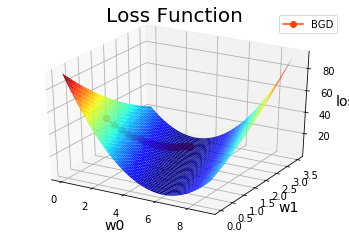

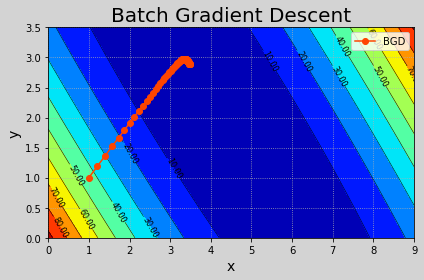

In [2]:

import numpy as np
import matplotlib.pyplot as mp

train_x = np.array([0.5, 0.6, 0.8, 1.1, 1.4])
train_y = np.array([5.0, 5.5, 6.0, 6.8, 7.0])

# 梯度下降
times = 100
lrate = 0.01  # 学习率
w0, w1,losses = [1], [1],[]
epoches=[]
for i in range(1, times + 1):
    epoches.append(i)
    loss = (((w0[-1] + w1[-1] * train_x) - train_y) ** 2).sum() / 2
    losses.append(loss)
    # 求取d0与d1，两方向的偏导数
    d0 = (w0[-1] + w1[-1] * train_x - train_y).sum()
    d1 = (train_x * (w0[-1] + w1[-1] * train_x - train_y)).sum()
    #输出w0,w1,loss的值
    print('{:4}> w0={:.6f}, w1={:.6f}, loss={:.6f}'.format(epoches[-1], w0[-1], w1[-1], losses[-1]))
    w0.append(w0[-1]-d0 * lrate)
    w1.append(w1[-1]-d1 * lrate)
print(w0[-1],w1[-1])


#绘图
# mp.figure('Linear Regreesion',facecolor='lightgray')
# mp.scatter(train_x,train_y,s=70,marker='o',color='blue',label='Sample Points')

#绘制回归线
# pred_y=w0[-1] + w1[-1] *train_x
# mp.plot(train_x,pred_y,color='orange',label='Regression Line')


# mp.legend()

#绘制w0函数变化曲线
# mp.figure('Training Process',facecolor='orange')
# mp.subplot(3,1,1)
# mp.grid(linestyle=':')
# mp.ylabel(r'$w_0$',fontsize=14)
# mp.plot(epoches,w0[:-1],color='blue',label=r'$w_0$')
# mp.legend()

#绘制w1函数变化曲线
# mp.figure('Training Process',facecolor='orange')
# mp.subplot(3,1,2)
# mp.grid(linestyle=':')
# mp.ylabel(r'$w_1$',fontsize=14)
# mp.plot(epoches,w1[:-1],color='gold',label=r'$w_1$')
# mp.legend()

#绘制losses函数变化曲线
# mp.figure('Training Process',facecolor='orange')
# mp.subplot(3,1,3)
# mp.grid(linestyle=':')
# mp.ylabel(r'$losses$',fontsize=14)
# mp.plot(epoches,losses,color='red',label=r'$losses$')
# mp.legend()

#绘制三维曲面（基于三维曲面绘制梯度下降过程中的每一个点。）
import mpl_toolkits.mplot3d as axes3d

grid_w0, grid_w1 = np.meshgrid(
    np.linspace(0, 9, 500),
    np.linspace(0, 3.5, 500))

grid_loss = np.zeros_like(grid_w0)
for x, y in zip(train_x, train_y):
    grid_loss += ((grid_w0 + x*grid_w1 - y) ** 2) / 2

mp.figure('Loss Function')
ax = mp.gca(projection='3d')
mp.title('Loss Function', fontsize=20)
ax.set_xlabel('w0', fontsize=14)
ax.set_ylabel('w1', fontsize=14)
ax.set_zlabel('loss', fontsize=14)
ax.plot_surface(grid_w0, grid_w1, grid_loss, rstride=10, cstride=10, cmap='jet')
ax.plot(w0[:-1], w1[:-1], losses, 'o-', c='orangered', label='BGD')                 #
mp.legend()

#以等高线的方式绘制梯度下降的过程
mp.figure('Batch Gradient Descent', facecolor='lightgray')
mp.title('Batch Gradient Descent', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.contourf(grid_w0, grid_w1, grid_loss, 10, cmap='jet')
cntr = mp.contour(grid_w0, grid_w1, grid_loss, 10,
                  colors='black', linewidths=0.5)
mp.clabel(cntr, inline_spacing=0.1, fmt='%.2f',
          fontsize=8)
mp.plot(w0, w1, 'o-', c='orangered', label='BGD')
mp.legend()

mp.tight_layout()
mp.show()

# 2-LinearRegression-线性回归

(50,) float64 (50,) float64
0.5482812185435971
0.43606903238180605
0.5356597030142565
0.736263899848181


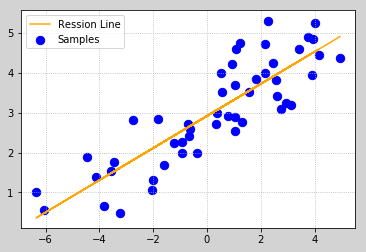

In [3]:
import sklearn.metrics as sm
import sklearn.linear_model as lm
import matplotlib.pyplot as mp
import numpy as np

#读取文件
x,y=np.loadtxt('./data/ml_data/single.txt',delimiter=',',usecols=(0,1),unpack=True)
print(x.shape,x.dtype,y.shape,y.dtype)

#训练模型

model=lm.LinearRegression()
x=x.reshape(-1,1)               #输入集转为n行1列
model.fit(x,y)

#预测
pred_y=model.predict(x)

# 平均绝对值误差：1/m∑|实际输出-预测输出|
print(sm.mean_absolute_error(y, pred_y))
# 平均平方误差：SQRT(1/mΣ(实际输出-预测输 出)^2)
print(sm.mean_squared_error(y, pred_y))
# 中位绝对值误差：MEDIAN(|实际输出-预测输出|)
print(sm.median_absolute_error(y, pred_y))
# R2得分，(0,1]区间的分值。分数越高，误差越小。
print(sm.r2_score(y, pred_y))

mp.figure('LinearRegression',facecolor='lightgray')
mp.grid(linestyle=':')
mp.scatter(x.ravel(),y.ravel(),s=70,color='blue',label='Samples')               #画出散点

mp.plot(x,pred_y,color='orange',label='Ression Line')
mp.legend()
mp.show()

# 3-dump*load-模型训练保存

(50,) float64 (50,) float64
0.5482812185435971
0.43606903238180605
0.5356597030142565
0.736263899848181
dump sucess


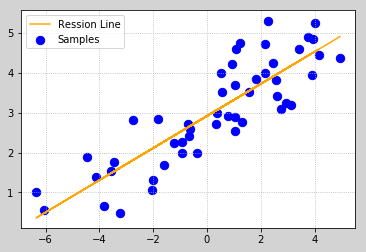

In [4]:
import sklearn.metrics as sm
import sklearn.linear_model as lm
import matplotlib.pyplot as mp
import numpy as np
import pickle


#读取文件
x,y=np.loadtxt('./data/ml_data/single.txt',delimiter=',',usecols=(0,1),unpack=True)
print(x.shape,x.dtype,y.shape,y.dtype)

#训练模型

model=lm.LinearRegression()
x=x.reshape(-1,1)               #输入集转为n行1列
model.fit(x,y)

# #预测
pred_y=model.predict(x)

#模型评估
# 平均绝对值误差：1/m∑|实际输出-预测输出|
print(sm.mean_absolute_error(y, pred_y))
# 平均平方误差：SQRT(1/mΣ(实际输出-预测输 出)^2)
print(sm.mean_squared_error(y, pred_y))
# 中位绝对值误差：MEDIAN(|实际输出-预测输出|)
print(sm.median_absolute_error(y, pred_y))
# R2得分，(0,1]区间的分值。分数越高，误差越小。
print(sm.r2_score(y, pred_y))

#模型的保存
with open('./data//ml_data/lr.pkl','wb')as f:
    pickle.dump(model,f)
    print('dump sucess')

mp.figure('LinearRegression',facecolor='lightgray')
mp.grid(linestyle=':')
mp.scatter(x.ravel(),y.ravel(),s=70,color='blue',label='Samples')               #画出散点

mp.plot(x,pred_y,color='orange',label='Ression Line')
mp.legend()
mp.show()

# 4-load-训练模型读取

(50,) float64 (50,) float64
0.5482812185435971
0.43606903238180605
0.5356597030142565
0.736263899848181


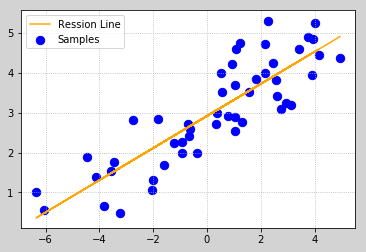

In [5]:
import sklearn.metrics as sm
import sklearn.linear_model as lm
import matplotlib.pyplot as mp
import numpy as np
import pickle
#读取文件
x,y=np.loadtxt('./data/ml_data/single.txt',delimiter=',',usecols=(0,1),unpack=True)
print(x.shape,x.dtype,y.shape,y.dtype)

#加载模型
with open('./data//ml_data/lr.pkl','rb')as f:
    model=pickle.load(f)


#训练模型
# model=lm.LinearRegression()
x=x.reshape(-1,1)               #输入集转为n行1列
model.fit(x,y)

#预测
pred_y=model.predict(x)

# 平均绝对值误差：1/m∑|实际输出-预测输出|
print(sm.mean_absolute_error(y, pred_y))
# 平均平方误差：SQRT(1/mΣ(实际输出-预测输 出)^2)
print(sm.mean_squared_error(y, pred_y))
# 中位绝对值误差：MEDIAN(|实际输出-预测输出|)
print(sm.median_absolute_error(y, pred_y))
# R2得分，(0,1]区间的分值。分数越高，误差越小。
print(sm.r2_score(y, pred_y))

mp.figure('LinearRegression',facecolor='lightgray')
mp.grid(linestyle=':')
mp.scatter(x.ravel(),y.ravel(),s=70,color='blue',label='Samples')               #画出散点

mp.plot(x,pred_y,color='orange',label='Ression Line')
mp.legend()
mp.show()

# 5-ridge-岭回归

(50,) float64 (50,) float64


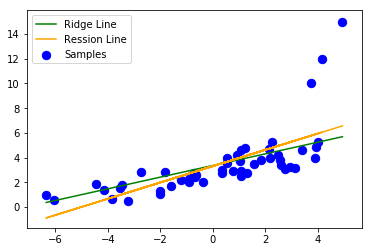

In [6]:
import sklearn.metrics as sm
import sklearn.linear_model as lm
import matplotlib.pyplot as mp
import numpy as np

#读取文件
x,y=np.loadtxt('./data/ml_data/abnormal.txt',delimiter=',',usecols=(0,1),unpack=True)
print(x.shape,x.dtype,y.shape,y.dtype)

model=lm.LinearRegression()
x=x.reshape(-1,1)               #输入集转为n行1列
model.fit(x,y)
linex=np.linspace(x.min(),x.max(),500)
liney=model.predict(linex.reshape(-1,1))
# mp.plot(linex,liney,color='red',label='Regression Line')
#预测
pred_y=model.predict(x)


#训练岭回归模型
model=lm.Ridge(150,fit_intercept=True,max_iter=10000)
model.fit(x,y)
liney=model.predict(linex.reshape(-1,1))
mp.plot(linex,liney,color='green',label='Ridge Line')


# mp.figure('LinearRegression',facecolor='lightgray')
# mp.grid(linestyle=':')
mp.scatter(x.ravel(),y.ravel(),s=70,color='blue',label='Samples')               #画出散点
# #
mp.plot(x,pred_y,color='orange',label='Ression Line')
mp.legend()
mp.show()

# 5-ridge-岭回归2

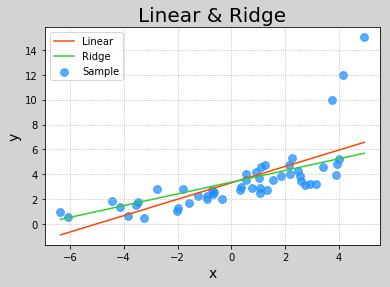

In [7]:
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as mp
# 采集数据
x, y = np.loadtxt('./data/ml_data/abnormal.txt', delimiter=',', usecols=(0,1), unpack=True)
x = x.reshape(-1, 1)
# 创建线性回归模型
model = lm.LinearRegression()
# 训练模型
model.fit(x, y)
# 根据输入预测输出
pred_y1 = model.predict(x)
# 创建岭回归模型
model = lm.Ridge(150, fit_intercept=True, max_iter=10000)
# 训练模型
model.fit(x, y)
# 根据输入预测输出
pred_y2 = model.predict(x)

mp.figure('Linear & Ridge', facecolor='lightgray')
mp.title('Linear & Ridge', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.scatter(x, y, c='dodgerblue', alpha=0.75,
           s=60, label='Sample')
sorted_indices = x.T[0].argsort()
mp.plot(x[sorted_indices], pred_y1[sorted_indices],
        c='orangered', label='Linear')
mp.plot(x[sorted_indices], pred_y2[sorted_indices],
        c='limegreen', label='Ridge')
mp.legend()
mp.show()

# 6-poly-多项式回归

0.7868629092058499


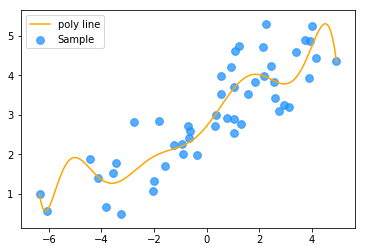

In [8]:

import numpy as np
import sklearn.pipeline as pl
import sklearn.preprocessing as sp
import sklearn.linear_model as lm
import sklearn.metrics as sm
import matplotlib.pyplot as mp
# 采集数据
x, y = np.loadtxt('./data/ml_data/single.txt', delimiter=',', usecols=(0,1), unpack=True)
#通过多项式特征扩展器与多元线性回归模型构建多项式回归模型(给出最高项次数)
model=pl.make_pipeline(sp.PolynomialFeatures(10),     #多项式特征扩展
                 lm.LinearRegression())         #线性回归模型
model.fit(x.reshape(-1,1),y)
pred_y=model.predict(x.reshape(-1,1))
print(sm.r2_score(y,pred_y))
#绘制多项式回归线
linex=np.linspace(x.min(),x.max(),500)
liney=model.predict(linex.reshape(-1,1))
mp.plot(linex,liney,color='orange',label='poly line')

# x = x.reshape(-1, 1)
# # 创建模型(管线)
# model = pl.make_pipeline(
#     sp.PolynomialFeatures(10),  # 多项式特征扩展器
#     lm.LinearRegression())      # 线性回归器
# # 训练模型
# model.fit(x, y)
# # 根据输入预测输出
# pred_y = model.predict(x)
# test_x = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
# pred_test_y = model.predict(test_x)
# mp.figure('Polynomial Regression', facecolor='lightgray')
# mp.title('Polynomial Regression', fontsize=20)
# mp.xlabel('x', fontsize=14)
# mp.ylabel('y', fontsize=14)
# mp.tick_params(labelsize=10)
# mp.grid(linestyle=':')
mp.scatter(x, y, c='dodgerblue', alpha=0.75, s=60, label='Sample')
# mp.plot(test_x, pred_test_y, c='orangered', label='Regression')

mp.legend()
mp.show()

# 7-boston-房屋价格

In [9]:

import sklearn.datasets as sd
import sklearn.utils as su
import  sklearn.tree as st
import  sklearn.metrics as sm


#读取数据
boston=sd.load_boston()
# print(boston.feature_names)
# print(boston.data[0],boston.data.shape)
# print(boston.target[0],boston.target.shape)

#打乱数据集后，拆分训练集与测试集
x,y=su.shuffle(boston.data,boston.target,random_state=7)
print(x,y)
train_size=int(len(x)*0.8)
print(train_size)
train_x,test_x,train_y,test_y=x[:train_size],x[train_size:],y[:train_size],y[train_size:]
print(train_x,test_x,train_y,test_y)
#构建决策树回归器模型，训练模型
model=st.DecisionTreeRegressor(max_depth=5)
# print(model)
model.fit(train_x,train_y)
# print(model)
pred_test_y=model.predict(test_x)
# print(pred_test_y)
pred_train_y=model.predict(train_x)
# print(pred_train_y)
#输出r2得分
print(sm.r2_score(test_y,pred_test_y))
print(sm.r2_score(train_y,train_y))

[[3.8497e+00 0.0000e+00 1.8100e+01 ... 2.0200e+01 3.9134e+02 1.3270e+01]
 [3.0410e-02 0.0000e+00 5.1900e+00 ... 2.0200e+01 3.9481e+02 1.0560e+01]
 [2.4103e-01 0.0000e+00 7.3800e+00 ... 1.9600e+01 3.9690e+02 1.2790e+01]
 ...
 [8.4054e-01 0.0000e+00 8.1400e+00 ... 2.1000e+01 3.0342e+02 1.6510e+01]
 [4.0110e-02 8.0000e+01 1.5200e+00 ... 1.2600e+01 3.9690e+02 4.0800e+00]
 [6.6640e-02 0.0000e+00 4.0500e+00 ... 1.6600e+01 3.9096e+02 5.3300e+00]] [21.7 18.5 22.2 20.4  8.8  8.3 21.4 23.6 23.5 19.  10.2 31.6 18.4 19.4
 44.  23.2 22.  33.1 13.2 21.7 16.7 23.9 42.3 18.5 14.6  7.5 33.4 22.
 28.1 24.8 19.9 24.8 28.7 14.1 43.5 20.4 18.3 13.4 21.  22.  22.6 13.9
 13.3 26.5 20.   9.5 21.6 22.6 15.6 23.1 27.1 25.2 15.  21.9  9.6 22.7
 18.3 21.4 20.5 21.1 24.5 31.  18.7 18.7 22.7 50.  16.7 23.  20.4 22.8
 24.8 10.5 18.2 31.5 23.8 19.6 12.7 15.2 31.2 14.5 17.8 25.  23.  50.
 23.7 25.1 24.7 16.8 34.7 23.3 50.  46.7 43.1 24.4 24.1  6.3 26.4 16.3
 17.2 28.  15.2 16.6 20.6 16.4 22.  17.2 13.5 23.3 26.2 19.7 

# 8-adaboost-正向激励

In [10]:

import sklearn.datasets as sd
import sklearn.utils as su
import  sklearn.tree as st
import  sklearn.metrics as sm
import  sklearn.ensemble as se

#读取数据
boston=sd.load_boston()
# print(boston.feature_names)
# print(boston.data[0],boston.data.shape)
# print(boston.target[0],boston.target.shape)

#打乱数据集后，拆分训练集与测试集
x,y=su.shuffle(boston.data,boston.target,random_state=7)
# print(x,y)
train_size=int(len(x)*0.8)
# print(train_size)
train_x,test_x,train_y,test_y=x[:train_size],x[train_size:],y[:train_size],y[train_size:]
# print(train_x,test_x,train_y,test_y)

#构建决策树回归器模型，训练模型
model=st.DecisionTreeRegressor(max_depth=5)

#构建正向激励回归器
model=se.AdaBoostRegressor(model,n_estimators=400,random_state=7)
model.fit(train_x,train_y)
pred_test_y=model.predict(test_x)
pred_train_y=model.predict(train_x)
print(sm.r2_score(test_y,pred_test_y))
print(sm.r2_score(train_y,pred_train_y))
#输出绝对误差
print(sm.mean_absolute_error(test_y,pred_test_y))

#特征重要性
fi=model.feature_importances_
print(fi)

0.9146372519405249
0.970700031060255
2.0748436269912847
[0.04162599 0.00202054 0.00718919 0.00059505 0.04341926 0.2819869
 0.0196626  0.09920403 0.01511787 0.03986936 0.03849006 0.01738971
 0.39342944]
